In [22]:
import pandas as pd
import seaborn as sbn
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It claims to all be non-null data, but! while 0 pregnancies is entirely reasonable
- 0 change in blood glucose after the challenge seems entirely unlikely
- 0 blood pressure would mean you were dead
- skin thickness 0 has got to be a lack of a measurement
- insulin 0 seems likely to be a lack of a measurement, though it could be rounding down from not detectable/below limit of detection
- BMI 0 is impossible

Note that glucose and insulin are following a 2-hour glucose tolerance test (common prenatal test, severely unpleasant). Blood pressure is diastolic only (lower number).

In [24]:
zero_replace_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
diabetes_data[zero_replace_cols] = diabetes_data[zero_replace_cols].replace(0, np.nan)
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
diabetes_nonnull = diabetes_data.dropna()
diabetes_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               532 non-null    int64  
 1   Glucose                   532 non-null    float64
 2   BloodPressure             532 non-null    float64
 3   SkinThickness             532 non-null    float64
 4   Insulin                   532 non-null    int64  
 5   BMI                       532 non-null    float64
 6   DiabetesPedigreeFunction  532 non-null    float64
 7   Age                       532 non-null    int64  
 8   Outcome                   532 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 41.6 KB


/Users/chesh1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chesh1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/chesh1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


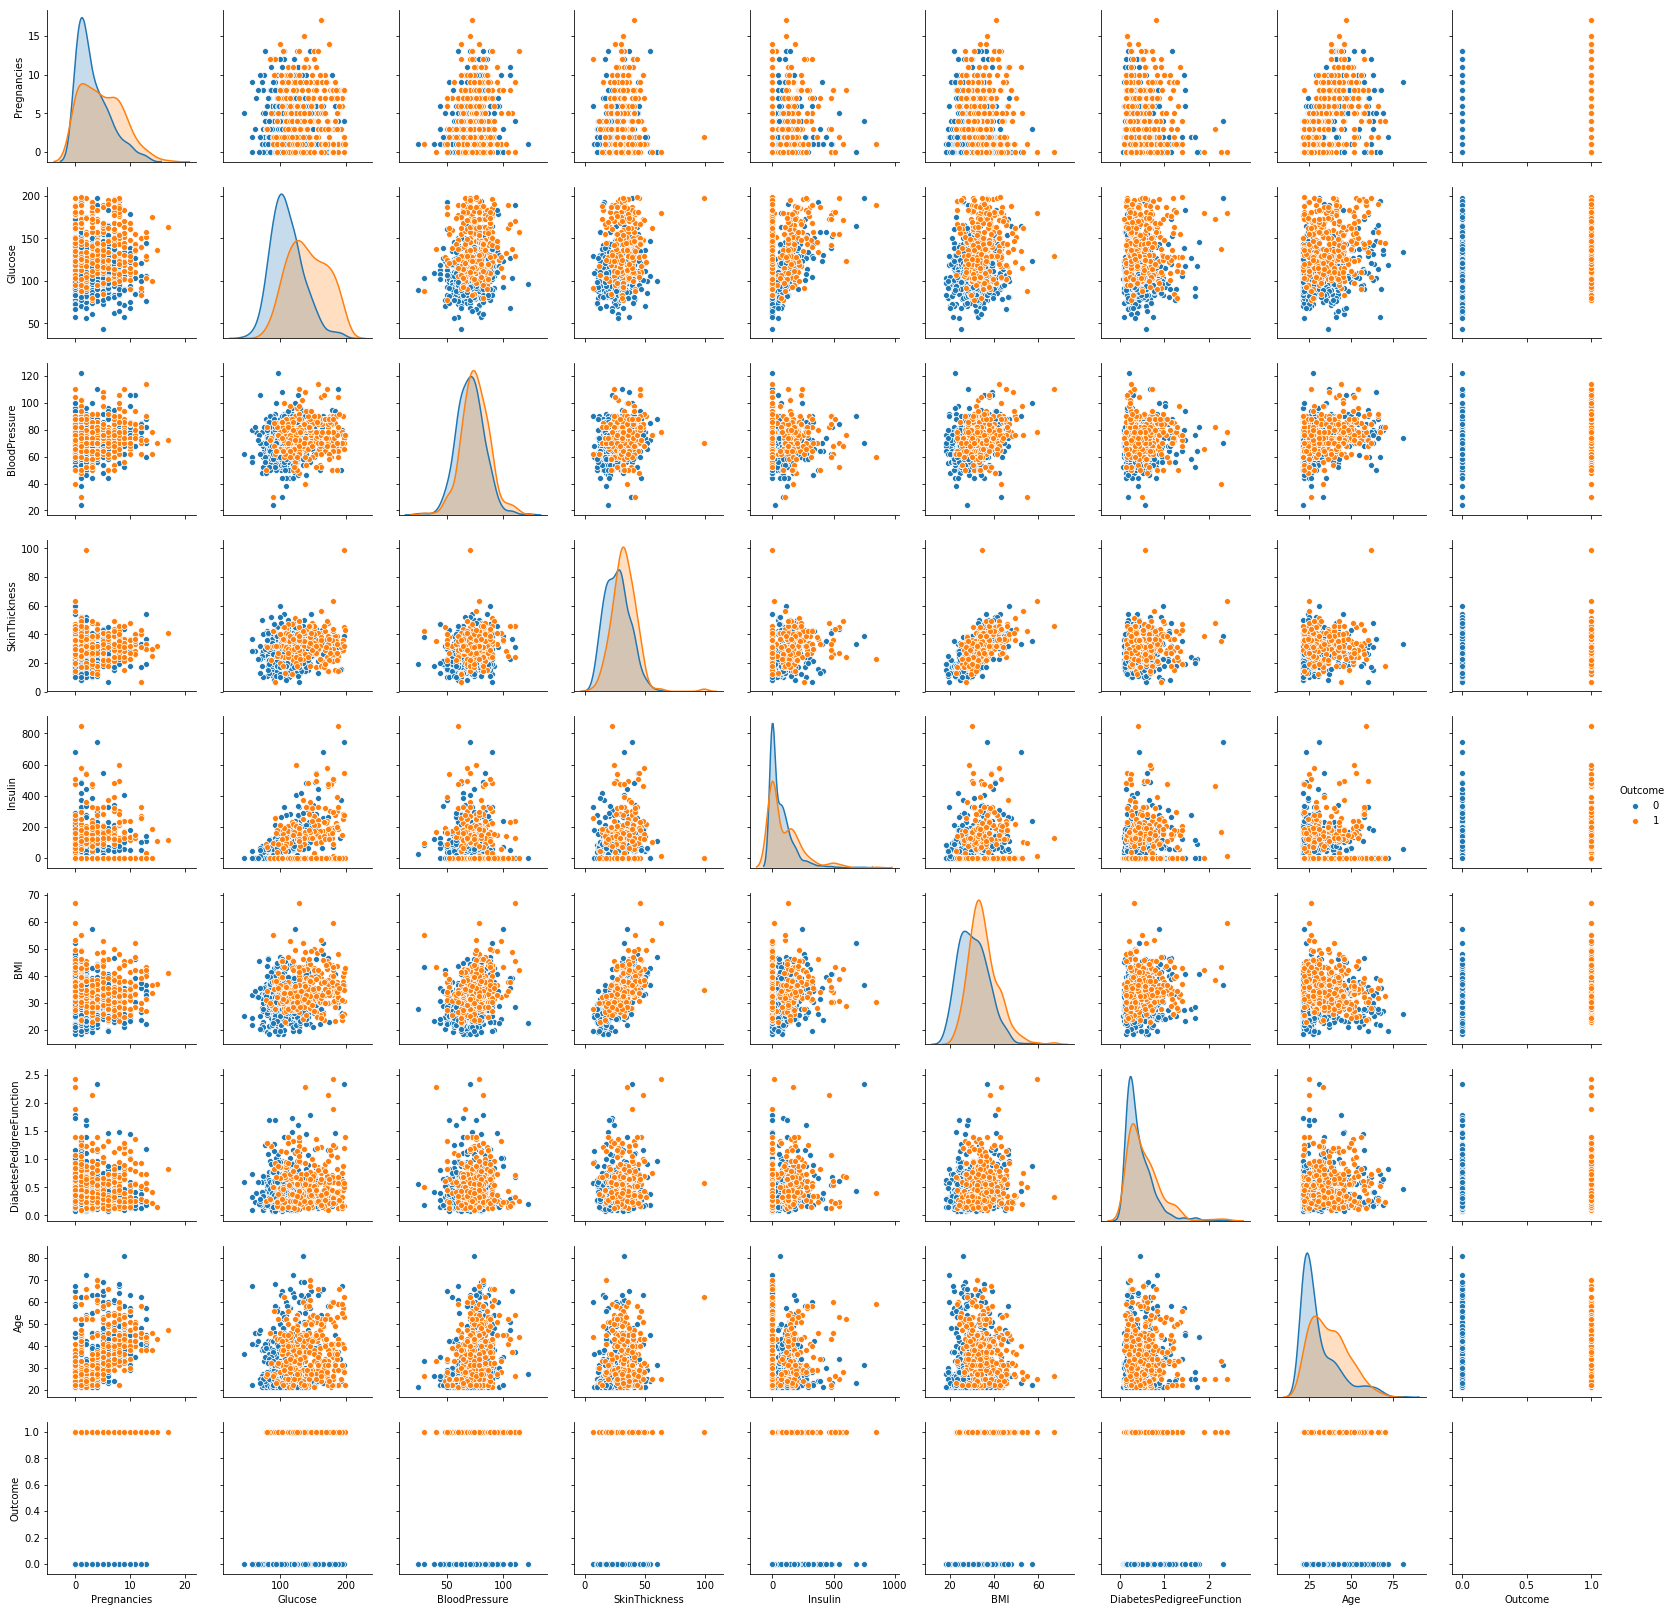

In [40]:
sbn.pairplot(diabetes_data, hue = 'Outcome')

In [41]:
fram_data = pd.read_csv('framingham.csv')
fram_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


/Users/chesh1/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/chesh1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/chesh1/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


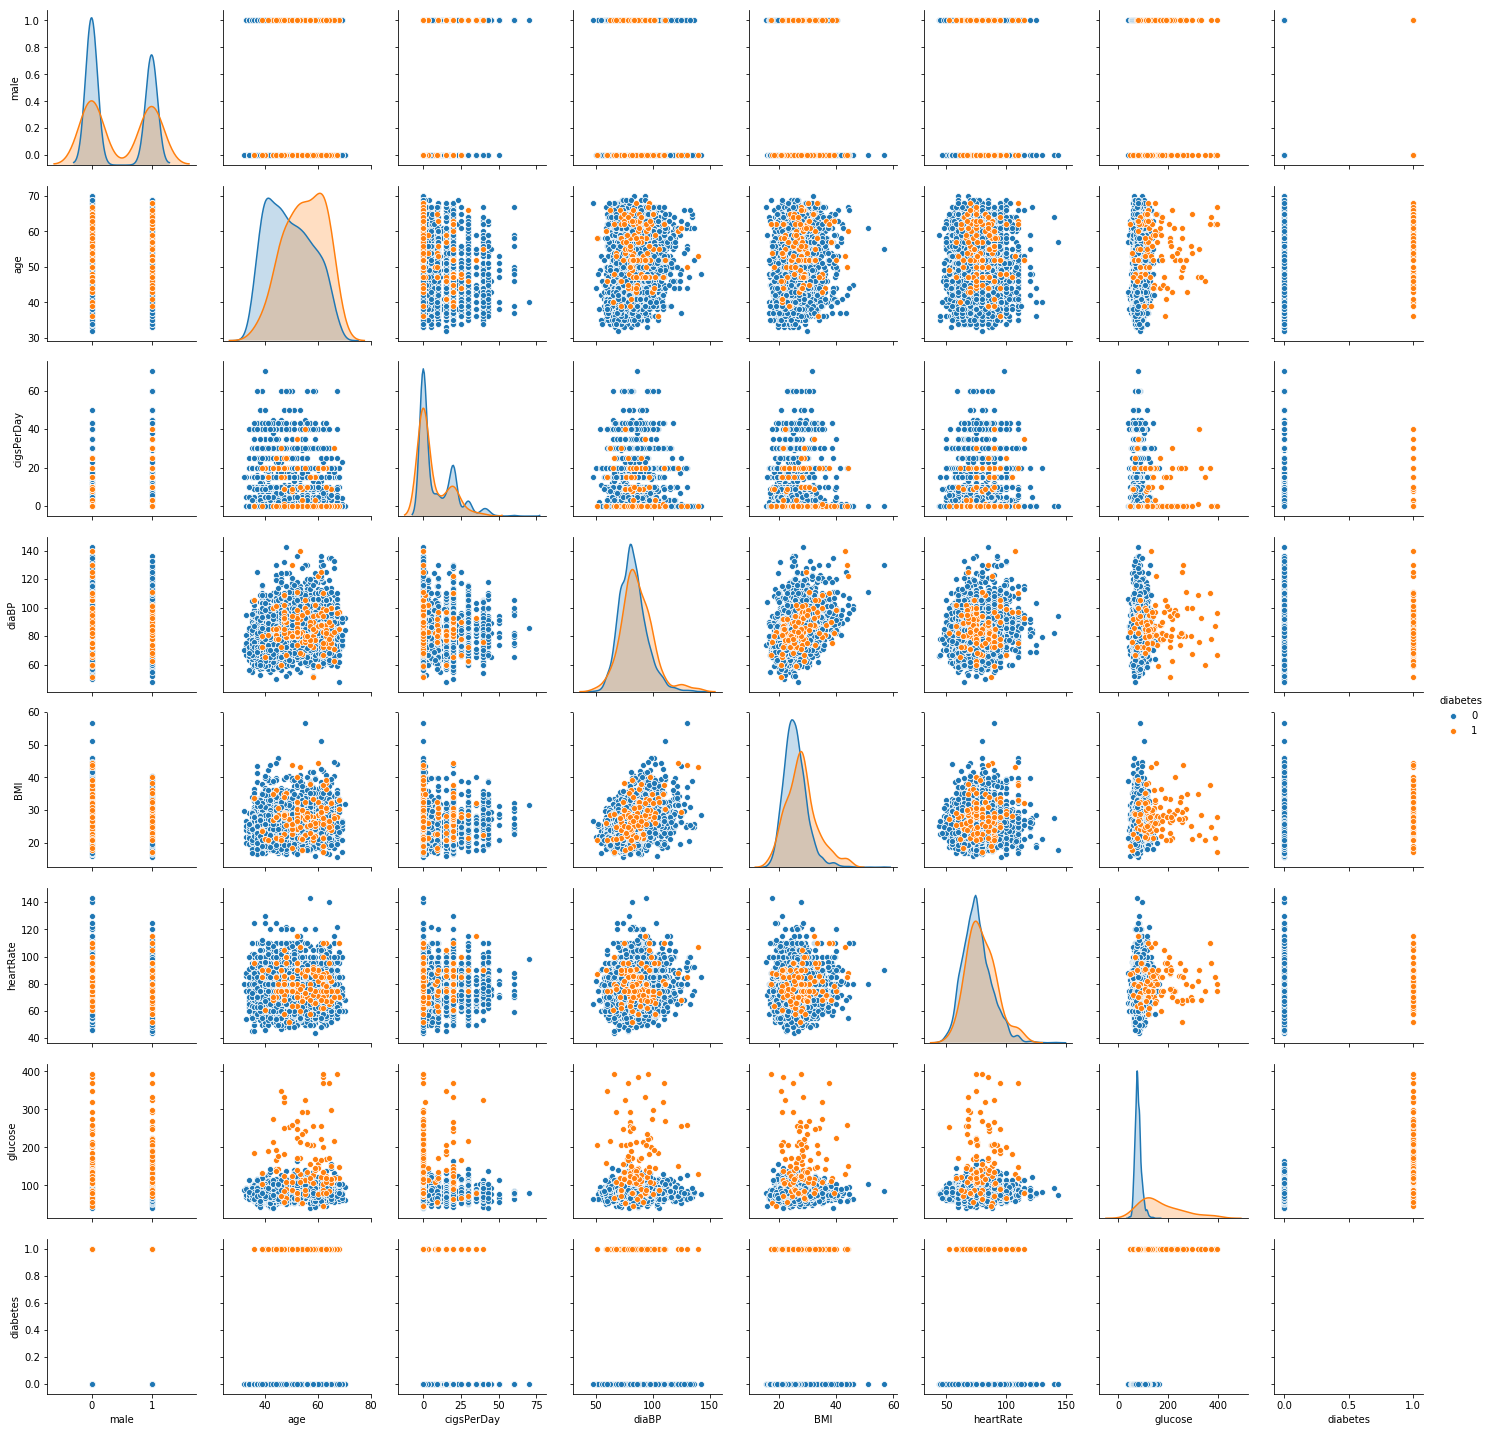

In [43]:
sbn.pairplot(fram_data[['male', 'age', 'cigsPerDay', 'diaBP', 'BMI', 'heartRate', 'glucose', 'diabetes']], hue = 'diabetes')

In [60]:
diabetes_data_noBMI = diabetes_data['BMI'].isna()

In [61]:
diabetes_data[diabetes_data_noBMI].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,11.000000,11.000000,4.000000,2.0,11.000000,0.0,11.000000,11.000000,11.000000
mean,3.909091,104.272727,79.250000,23.0,8.090909,NaN,0.433273,30.454545,0.181818
std,3.505839,19.652435,13.400871,0.0,26.834510,NaN,0.460162,15.945931,0.404520
min,0.000000,74.000000,64.000000,23.0,0.000000,NaN,0.102000,21.000000,0.000000
25%,1.000000,89.000000,72.250000,23.0,0.000000,NaN,0.210500,21.500000,0.000000
50%,3.000000,105.000000,78.500000,23.0,0.000000,NaN,0.261000,24.000000,0.000000
75%,6.500000,116.500000,85.500000,23.0,0.000000,NaN,0.438500,28.000000,0.000000
max,10.000000,136.000000,96.000000,23.0,89.000000,NaN,1.731000,69.000000,1.000000


In [62]:
diabetes_data_noST = diabetes_data['SkinThickness'].isna()
diabetes_data[diabetes_data_noST].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,227.000000,227.000000,194.000000,0.0,227.0,218.000000,227.000000,227.000000,227.000000
mean,4.638767,123.449339,75.025773,NaN,0.0,31.373853,0.393291,37.251101,0.387665
std,3.350062,29.572931,12.305454,NaN,0.0,6.952505,0.276871,13.062933,0.488294
min,0.000000,44.000000,48.000000,NaN,0.0,18.200000,0.078000,21.000000,0.000000
25%,2.000000,105.000000,66.000000,NaN,0.0,25.925000,0.203000,27.000000,0.000000
50%,4.000000,120.000000,74.500000,NaN,0.0,30.850000,0.282000,34.000000,0.000000
75%,7.000000,140.500000,82.000000,NaN,0.0,35.300000,0.536500,45.000000,1.000000
max,13.000000,197.000000,122.000000,NaN,0.0,52.900000,1.781000,72.000000,1.000000
